# Programming Assignment 2: Linear regression

As we know, the COVID-19 pandemic has been disrupting people's life around the world. To get it under control, a crucial aspect is to be able to accurate forecast the spread of the disease, which can be helpful as a planning tool for policymakers, clinicians, and public health officers to deal with this crisis. In this notebook,we will try to do some forecasting on the covid-19 epidemic progression using machine learning. We will use a dataset based on the COVID-19 Data Repository at John Hopkins university.

In [25]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import numpy as np
from math import sqrt 
import sys

In [26]:
print (sys.version)
print(pd.__version__)


3.6.4 |Anaconda, Inc.| (default, Jan 16 2018, 10:22:32) [MSC v.1900 64 bit (AMD64)]
1.1.1


First, let us load the data.

In [27]:
data_orig = pd.read_csv("us_covid_data.csv")
data = data_orig.copy()
print (data_orig.columns)
data_orig

Index(['Unnamed: 0', 'date', 'Country', 'hospitalized_with_symptom',
       'Intensive_care', 'Total_hospitalized', 'Home_Isolation',
       'Total_positive', 'Daily_change_in_positive_cases',
       'New_positive_cases', 'Recovered', 'Deaths', 'Total_cases',
       'People_tested'],
      dtype='object')


Unnamed: 0                 date Country  hospitalized_with_symptom  \
0             0  2020-02-24T18:00:00      US                        101   
1             1  2020-02-25T18:00:00      US                        114   
2             2  2020-02-26T18:00:00      US                        128   
3             3  2020-02-27T18:00:00      US                        248   
4             4  2020-02-28T18:00:00      US                        345   
..          ...                  ...     ...                        ...   
201         201  2020-09-12T17:00:00      US                       1951   
202         202  2020-09-13T17:00:00      US                       2042   
203         203  2020-09-14T17:00:00      US                       2122   
204         204  2020-09-15T17:00:00      US                       2222   
205         205  2020-09-16T17:00:00      US                       2285   

     Intensive_care  Total_hospitalized  Home_Isolation  Total_positive  \
0                26                 127              94             221   
1                35                 150             162             311   
2                36                 164             221             385   
3                56                 304             284             588   
4                64                 409             412             821   
..              ...                 ...             ...             ...   
201             182                2133           35370           37503   
202             187                2229           36280           38509   
203             197                2319           36868           39187   
204             201                2423           37289           39712   
205             207                2492           38040           40532   

     Daily_change_in_positive_cases  New_positive_cases  Recovered  Deaths  \
0                                 0                 221          1       7   
1                                90                  93          1      10   
2                                74                  78          3      12   
3                               203                 250         45      17   
4                               233                 238         46      21   
..                              ...                 ...        ...     ...   
201                             736                1501     213191   35603   
202                            1006                1458     213634   35610   
203                             678                1008     213950   35624   
204                             525                1229     214645   35633   
205                             820                1452     215265   35645   

     Total_cases  People_tested  
0            229           4324  
1            322           8623  
2            400           9587  
3            650          12014  
4            888          15695  
..           ...            ...  
201       286297        9745975  
202       287753        9818118  
203       288761        9863427  
204       289990        9943944  
205       291442       10044551  

[206 rows x 14 columns]

In [28]:
# change the date format
dates = data['date']
date_format = [pd.to_datetime(d) for d in dates]

# Data Visualization

**Task P1:** complete the following **three** visualization graphs that show the trend of the epidemic progression. Copy them to the solution file.

Graph 1: plot the total number of people tested for the entire period of the dataset. Your X axis will be the dates ("Dates") and Y-axis will be the total number of cases ("People_tested") over the period of time.

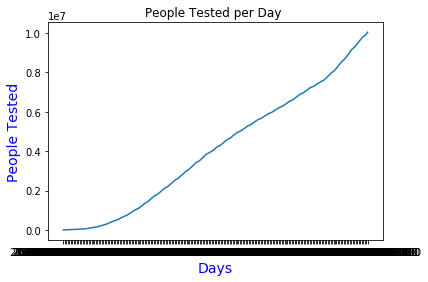

In [29]:
# Add code to plot the trend of the total number of people being tested as days progressed.
# X axis -> dates('Dates')
# Y axis -> number of people tested.('People_tested')

### STUDENT: Start of Code ###
x = dates.to_numpy()
y= data['People_tested'].to_numpy()

plt.plot(x,y)
plt.title("People Tested per Day " )
plt.ylabel("People Tested", fontsize=14, color='blue')
plt.xlabel('Days', fontsize=14, color='blue')

plt.show()
### End of code ####

Graph 2: plot the total number of deaths for the entire period. Your X axis will be the dates ("Dates") and Y-axis will be the total number of death cases("Deaths") over the period of time.

Text(0.5,0,'Days')

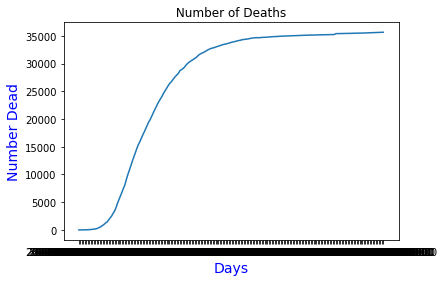

In [30]:
# Add code to plot the trend of total deaths as days progressed.
# X axis -> dates ('Dates')
# Y axis -> number of deaths ('Deaths')


### STUDENT: Start of Code ###

x = dates.to_numpy()
y= data['Deaths'].to_numpy()

plt.plot(x,y)
plt.title(" Number of Deaths " )
plt.ylabel("Number Dead", fontsize=14, color='blue')
plt.xlabel('Days', fontsize=14, color='blue')

### End of code ####

Graph 3: plot the total number of infected cases for the entire period. Your X axis will be the dates ("Dates") and Y-axis will be the total number of infected cases ('New_positive_cases') over the period of time.

Text(0.5,0,'Days')

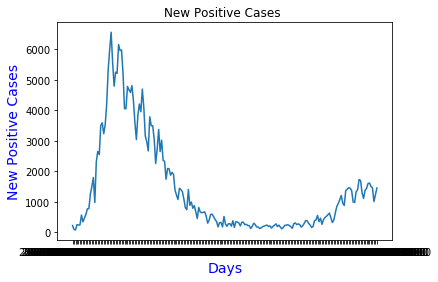

In [31]:
### STUDENT: Start of Code ###
x = dates.to_numpy()
y= data['New_positive_cases'].to_numpy()

plt.plot(x,y)
plt.title("New Positive Cases " )
plt.ylabel("New Positive Cases", fontsize=14, color='blue')
plt.xlabel('Days', fontsize=14, color='blue')


### End of code ####

As we can see that our data has different ranges of values for every feature and this can cause problems in our model, so here we will normalize our data (ignoring the categorical variables) so that our data is scaled between 0 and 1. The downside, however, is that the numbers are no longer interpretable. To interpret it, you need to multiply back by the scaling factor.

**IMPORTANT: ** From now on, we will work with the normalized features to build the regression model. However, in **Task P8**, you need to convert the number back to the actual units.

In [32]:
data_list = data_orig.columns.values.tolist()

for i in data_list[-11:]:
    data[[i]]=(data_orig[i]-data_orig[i].min())/(data_orig[i].max()-data_orig[i].min())
    
data

Unnamed: 0                 date Country  hospitalized_with_symptom  \
0             0  2020-02-24T18:00:00      US                   0.000000   
1             1  2020-02-25T18:00:00      US                   0.000450   
2             2  2020-02-26T18:00:00      US                   0.000934   
3             3  2020-02-27T18:00:00      US                   0.005085   
4             4  2020-02-28T18:00:00      US                   0.008440   
..          ...                  ...     ...                        ...   
201         201  2020-09-12T17:00:00      US                   0.063994   
202         202  2020-09-13T17:00:00      US                   0.067142   
203         203  2020-09-14T17:00:00      US                   0.069909   
204         204  2020-09-15T17:00:00      US                   0.073368   
205         205  2020-09-16T17:00:00      US                   0.075547   

     Intensive_care  Total_hospitalized  Home_Isolation  Total_positive  \
0          0.000000            0.000000        0.000000        0.000000   
1          0.002227            0.000700        0.000814        0.000833   
2          0.002474            0.001125        0.001520        0.001518   
3          0.007422            0.005384        0.002274        0.003397   
4          0.009401            0.008577        0.003806        0.005554   
..              ...                 ...             ...             ...   
201        0.038595            0.061015        0.422174        0.345089   
202        0.039832            0.063935        0.433064        0.354400   
203        0.042306            0.066673        0.440101        0.360676   
204        0.043295            0.069836        0.445140        0.365536   
205        0.044780            0.071935        0.454128        0.373126   

     Daily_change_in_positive_cases  New_positive_cases  Recovered    Deaths  \
0                          0.590051            0.022071   0.000000  0.000000   
1                          0.597704            0.002315   0.000000  0.000084   
2                          0.596344            0.000000   0.000009  0.000140   
3                          0.607313            0.026547   0.000204  0.000281   
4                          0.609864            0.024695   0.000209  0.000393   
..                              ...                 ...        ...       ...   
201                        0.652636            0.219633   0.990365  0.998821   
202                        0.675595            0.212996   0.992423  0.999018   
203                        0.647704            0.143541   0.993891  0.999411   
204                        0.634694            0.177651   0.997120  0.999663   
205                        0.659779            0.212070   1.000000  1.000000   

     Total_cases  People_tested  
0       0.000000       0.000000  
1       0.000319       0.000428  
2       0.000587       0.000524  
3       0.001446       0.000766  
4       0.002263       0.001133  
..           ...            ...  
201     0.982333       0.970262  
202     0.987332       0.977447  
203     0.990794       0.981960  
204     0.995014       0.989980  
205     1.000000       1.000000  

[206 rows x 14 columns]

# Calculate the feature matrix

The following is a function that accepts a list of feature names (e.g. ['Total_Hospitalized', 'People_tested']) and an target feature e.g. ('Deaths') and returns two things:

1. A numpy matrix whose columns are the desired features plus a column with a constant value 1, which is also known as the 'intercept'.
2. A numpy array that contains the values of the target output.


In [33]:
def get_numpy_data(data_frame, features, output):
    # Steps
    # select the columns of data_Frame given by the features list into the variable features_sframe which will include the constant
    # Convert the features_frame into a numpy matrix
    # assign the column of data_frame associated with the output to the array output_array
    # convert the array into a numpy array by first converting it to a list
    # return feature_matrix,output_array
    
    data_frame['constant'] = 1 # here we are adding a constant column 
    # add the column 'constant' to the front of the features list.
    features = ['constant'] + features 
        
    # select the columns of data_Frame given by the features list into the variable features_sframe which will include the constant)
    features_frame = data_frame[features]
    #print(features_frame)
    # Convert the features_frame into a numpy matrix
    feature_matrix = features_frame.to_numpy()
    # print ("feature_matrix:", feature_matrix)
    
    # assign the column of data_frame associated with the output to the array output_array
    output_array = data_frame[output]
    
    # convert the array into a numpy array by first converting it to a list
    output_array = output_array.to_numpy()
    
    return(feature_matrix, output_array)    

For dates, we need to convert them into a sequence of numbers. We now add a new column to our dataframe corresponding to the number of days since the start of the dataset.

In [34]:
X = date_format
day_numbers = []
for i in range(1, len(X) + 1):
    day_numbers.append([i])
    
data['Days'] = pd.DataFrame(day_numbers,columns = ['Days'])
data["Days"] = data["Days"].astype(int)

Test the above function for a particular input and output feature.

In [35]:
(example_features, example_output) = get_numpy_data(data, ['Days'], 'New_positive_cases')
print (example_features[0,:])
print (example_output[0]) 

[1 1]
0.022071307300509338


# Predict the outputs with given regression weights

Suppose we had the weights $[1, 1]$ corresponding to the features $[1, 100]$, to compute the predicted output, we can simply take the dot product between them, so the output is $1*1 + 1*100 = 101$. Now, let's create the data with 

In [36]:
(test_features, output) = get_numpy_data(data, ['Days'], 'People_tested')

**Task P2:** Complete the following function  'predict_output'. Copy the the outputs of the code to the solution file.

In [37]:
def predict_output(feature_matrix, weights):
    # Inputs:
    # feature_matrix: a numpy matrix containing the features as columns (including the intercept), 
    #                 and each row corresponds to a data point
    # weights: a numpy array for the corresponding regression weights (including the intercept)
    # Output:
    # a numpy array that contains the predicted outputs (according to the provided weights) 
    # for all the data points in the feature_matrix
 
    # STUDENT: Start of code ####
    
    predictions=[]
    sum = 0
    rowSum = 0;
    max_value = 0;
    #get dot product for each row
    for i in range(len(feature_matrix)):
        rowSum = 0
        #dot
        for j in range(len(feature_matrix[i])):
            rowSum =rowSum + (feature_matrix[i][j]*weights[j])
        #for normalization    
        if(rowSum>max_value):
            max_value = rowSum
        #list of predictions from dot product    
        predictions.append(rowSum)
    #normalize
    for i in range(len(predictions)):
        predictions[i]=(predictions[i]+1)/(max_value+1)
    
    return predictions
    ## end of code

In [38]:
# Copy the outputs of this code to the solution file
my_weights = np.array([1., 1.])

test_predictions = predict_output(test_features, my_weights)
print ("(normalized) prediction at day 5: ", test_predictions[5]) 
print ("(normalized) prediction at day 20 ", test_predictions[20])

(normalized) prediction at day 5:  0.038461538461538464
(normalized) prediction at day 20  0.11057692307692307


# Compute the derivative

We will now compute the derivative of the regression cost function: 
$$L_D(w) = \frac{1}{n}\sum_{i=1}^n (y_i-w\cdot x_i)^2,$$
where $x_i\in \mathrm{R}^d$ is the input feature of dimension $d$, $y_i\in\mathrm{R}$ is the output response, and $w\in\mathrm{R}^d$ is the regression weights.

**Task P3:** Complete the function 'weight_derivative' to calculate the derivative of the cost function with respect to regression weights $w$, i.e., $\frac{\partial}{\partial w}L_D(w)$. Note that this should be a $d$ dimensional vector. Also copy the output of the code for the test example to the solution file.

In [39]:
def weight_derivative(weights, feature_matrix, labels):
    # Input:
    # weights: weight vector w, a numpy vector of dimension d
    # feature_matrix: numpy array of size n by d, where n is the number of data points, and d is the feature dimension
    # labels: true labels y, a numpy vector of dimension d
    # Output:
    # Derivative of the regression cost function with respect to the weight w, a numpy array of dimension d
        
    ## STUDENT: Start of code ###
    
    sum = 0
    #get array of normalized dot produts
    dot_product=predict_output(feature_matrix,weights)
    #sum the diffrence between dot and true value
    for i in range(len(feature_matrix)):
        
        diffrence = labels[i] - dot_product[i]
        sum = sum + diffrence
    #finsh derive ative of regressive cost function    
    return sum/(len(feature_matrix))*2
    # End of code ###

In [40]:
# NOTE: copy the output to the solution file.

(example_features, example_output) = get_numpy_data(data, ['Days'], 'People_tested') 

my_weights = np.array([0., 0.]) # this makes all the predictions 0
derivative = weight_derivative(my_weights, example_features,example_output)

print (derivative)

-1.1789675787713623


# Gradient descent algorithm

Here, we will write a function to perform gradient descent algorithm on the lineare regression cost. Given an initial point, we will update the current weights by moving in the negative gradient direction to minimize the cost function. Thus, in each iteration we obtain the updated weight $w_{t+1}$ from the current iterate $w_t$ as follows:
$$w_{t+1} = w_t - h\frac{\partial}{\partial w}L_D(w_t),$$
where $h$ is the 'step_size' that is the amount by which we move in the negative gradient direction. 

We stop when we are sufficiently close to the optimum (where gradient is the zero vector) by checking the condition with respect to the magnitude (length) of the gradient vector:
$$\|\frac{\partial}{\partial w}L_D(w_t)\|_2\leq \epsilon,$$
where $\epsilon$ is the 'tolerance' parameter.

**Task P4:** Complete the code section to perform the gradient decent in the function `regression_gradient_descent`. Copy the code to the solution file.

In [50]:
def regression_gradient_descent(feature_matrix, labels, initial_weights, step_size, tolerance):
    # Gradient descent algorithm for linear regression problem    
    
    # Input:
    # feature_matrix: numpy array of size n by d, where n is the number of data points, and d is the feature dimension
    # labels: true labels y, a numpy vector of dimension d
    # initial_weights: initial weight vector to start with, a numpy vector of dimension d
    # step_size: step size of update
    # tolerance: tolerace epsilon for stopping condition
    # Output:
    # Weights obtained after convergence
    
    converged = False 
    weights = np.array(initial_weights) # current iterate
    i = 0
    while not converged:
        i += 1
        # STUDENT: Start of code: your impelementation of what the gradient descent algorithm does in every iteration
        # Refer back to the update rule listed above: update the weight
        # Compute the gradient magnitude:
        
        weight_deriv = weight_derivative(weights[i-1], feature_matrix,labels)
        
        temp_gradient = [0]*len(weights[i-1])
        
        for a in range(len(weights[i-1])):
            weight_deriv= weight_deriv*step_size
            temp_gradient[a] =  weights[i-1][a] - weight_deriv
        gradient_magnitude = temp_gradient
        
        #size of gradient magnitude
        gradient_size = 0
        
        for a in gradient_magnitude:
            gradient_size += pow(a,2)
        gradient_size = pow(gradient_size,1/2)
        
        #reasign weights
        for j in range(len(weights[i])):
            weights[i][j]=gradient_magnitude[j]
            #weights[i][j]=temp_gradient[j]
            
        # Check the stopping condition to decide whether you want to stop the iterations
        if (gradient_size>=tolerance):             # STUDENT: check the stopping condition here
            converged = True
        if (i>=len(weights)-1):             # STUDENT: check the stopping condition here
            converged = True
        # End of code
        
        print ("Iteration: ",i,"gradient_magnitude: ", gradient_magnitude) # for us to check about convergence
        
    return(gradient_magnitude)

# Use gradient descent for linear regression

Let's test the gradient descent algorithm for linear regression with a single feature ('Day'). Here we are using first 180 days' data as our training data.

In [51]:
#train_data
train_data = data[:180]

**Task P5:** Specify the initial_weights, step_size, and tolerance for the function `regression_gradient_descent`. Copy the outputs of the code to the solution file.


In [52]:
simple_features = ['Days']
my_output = 'People_tested'

# Use get_numpy_data method to calculate the feature matrix and output. 
(simple_feature_matrix, output) = get_numpy_data(train_data, simple_features, my_output)

#Initialize the weights, step size and tolerance
# Start of code
#STUDENT: Specify the initial_weights, step_size, and tolerance

temp_weights = np.array([0.]*2*len(simple_feature_matrix))

initial_weights = temp_weights.reshape(len(simple_feature_matrix),2)
step_size = 0.05
tolerance = 1
# end of code

# Use the regression_gradient_descent function to calculate the gradient decent and store it in the variable 'final_weights'
final_weights = regression_gradient_descent(simple_feature_matrix, output, initial_weights, step_size, tolerance)

# end of code
print ("Here are the final weights after convergence:")
print (final_weights)

Iteration:  1 gradient_magnitude:  [0.06592743077975785, 0.0032963715389878927]
Iteration:  2 gradient_magnitude:  [0.11407448303180767, 0.005703724151590385]
Iteration:  3 gradient_magnitude:  [0.15615585311634989, 0.007807792655817495]
Iteration:  4 gradient_magnitude:  [0.1948031169901319, 0.009740155849506596]
Iteration:  5 gradient_magnitude:  [0.23116017017581494, 0.011558008508790747]
Iteration:  6 gradient_magnitude:  [0.2658506994590075, 0.013292534972950376]
Iteration:  7 gradient_magnitude:  [0.29925989583773044, 0.014962994791886522]
Iteration:  8 gradient_magnitude:  [0.33164556477677176, 0.016582278238838587]
Iteration:  9 gradient_magnitude:  [0.36319029772564665, 0.018159514886282334]
Iteration:  10 gradient_magnitude:  [0.39402898441247575, 0.019701449220623786]
Iteration:  11 gradient_magnitude:  [0.42426458817639945, 0.02121322940881997]
Iteration:  12 gradient_magnitude:  [0.4539777852484522, 0.02269888926242261]
Iteration:  13 gradient_magnitude:  [0.48323315727271

C:\Users\kuent\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


**Task P6:** Use the learned weights to predict 'People_tested' in the last three weeks in the dataset. Copy the predictions to the solution file, and calculate the test error
$$\frac{1}{n_{\mathrm{tst}}}\sum_{i=1}^{n_{\mathrm{tst}}} (y_i^{\mathrm{tst}}-\hat{y}_i^{\mathrm{tst}})^2,$$
where $n_{\mathrm{tst}}$ is the number of test data, $y_i^{\mathrm{tst}}$ is the true label, $\hat{y}_i^{\mathrm{tst}}$ is the predicted label.

In [44]:
# Create the test data
test_data = data.iloc[-21:]
(test_simple_feature_matrix, test_output) = get_numpy_data(test_data, simple_features, my_output)
test_predictions = predict_output(test_simple_feature_matrix, final_weights)


C:\Users\kuent\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [45]:
# Calculate the test error
# STUDENT: Start of code
test_error = 0;
size = len(test_predictions)

#print (test_output)
#print(test_predictions)
for i in range(size):
    diff= test_output[i]-test_predictions[i]
    test_error+=pow(diff,2)

print(test_error/size)
#end of code

0.002727328133312371


# Linear regression using multiple features

Here, we will be considering multiple input features (`Intensive_care`,`New_positive_cases`,`Days`) to predict the `People_tested` in the future.

**Task P7:** Specify the initial_weights, step_size, and tolerance for the function `regression_gradient_descent`. Print the outputs of the code.


In [46]:
model_features = ['Intensive_care','New_positive_cases','Days'] 
my_output = 'People_tested'

#call the get_nupy_data method to calculate the feature matrix and output. Store them in the variables "multi_feature_matrix" & "output"

(multi_feature_matrix, output) = get_numpy_data(data, model_features, my_output)

# Initialize the weights, step size and tolerance
# STUDENT: Start of code
# STUDENT: Specify the initial_weights, step_size, and tolerance
#print(len(multi_feature_matrix))
temp_weights = np.array([0.]*4*len(multi_feature_matrix))

initial_weights = temp_weights.reshape(len(multi_feature_matrix),4)
#print(initial_weights)
step_size = 0.05
tolerance = 1
#print(multi_feature_matrix)
#print(output)
# end of code

weight_2 = regression_gradient_descent(multi_feature_matrix, output, initial_weights, step_size, tolerance)
print ("Here are the final weights after convergence:")
print (weight_2)

Here are the final weights after convergence:
[1.0439592334600856, 0.052197961673004264, 0.002609898083650214, 0.00013049490418251073]


**Task P8:** Use the learned weights to predict 'People_tested' in the last three weeks in the dataset.Find the value of the model predictions on the 10th day of the forecasting period.Also print the actual number of people tested on that particular day. Copy the predictions to the solution file, and calculate the test error. Note: here we are asking you to report the number before normalization. So you need to convert the prediction back to the unit of people.

In [47]:
(test_feature_matrix, test_output) = get_numpy_data(test_data, model_features, my_output)

test_predictions_2 = predict_output(test_feature_matrix, weight_2)

#Prediction for the 10th day of the forecasting period.
print (test_predictions_2[10])

#Convert the normalized data back to original figures using the same min-max normalization
prediction_10th_day = test_predictions_2[10] * (data_orig['People_tested'].max() - data_orig['People_tested'].min()) + data_orig['People_tested'].min()

print ("Model prediction of the 10th day:",int(prediction_10th_day))

# Get the actual number of people tested from our test data on 10 th day of forecasting period.
actual_people_tested = data_orig["People_tested"].iloc[190]

print ("Actual number of people tested on the 10th day:",actual_people_tested)


0.9988797902036922
Model prediction of the 10th day: 10033303
Actual number of people tested on the 10th day: 8725909


C:\Users\kuent\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [48]:
# Calculate the test error
# STUDENT: Start of code
test_error = 0;
size = len(test_predictions_2)

for i in range(size):
    diff= test_output[i]-test_predictions_2[i]
    test_error+=pow(diff,2)

print(test_error/size)

# end of code

0.009706376971805162


# Explore on your own

Now that you have tried two models for predictions, in this section, you can explore on your own an aspect of the problem that interests you. Here are some examples:
* What features or what combination of features are most predictive for 'People_tested'?
* How does tolerance for convergence affect prediction errors?
* How does step size affect prediction errors?
* How can we use validation to select the set of features to improve prediction?

Report your question of investigation, as well as your results/interpretation in the solution file.

In [49]:
# Explore an aspect of the model that interests you
### STUDENT: Start of code
model_features = ['Intensive_care','New_positive_cases','Days'] 
my_output = 'People_tested'

#call the get_nupy_data method to calculate the feature matrix and output. Store them in the variables "multi_feature_matrix" & "output"

(multi_feature_matrix, output) = get_numpy_data(data, model_features, my_output)

# Initialize the weights, step size and tolerance
# STUDENT: Start of code
# STUDENT: Specify the initial_weights, step_size, and tolerance

temp_weights = np.array([0.]*4*len(multi_feature_matrix))

step_size = 0.05
tolerance = 1

while tolerance < 20:
    
    print ('tolerance: ', end = ' ')
    print(tolerance)
    
    initial_weights = temp_weights.reshape(len(multi_feature_matrix),4)

    weight_2 = regression_gradient_descent(multi_feature_matrix, output, initial_weights, step_size, tolerance)

    (test_feature_matrix, test_output) = get_numpy_data(test_data, model_features, my_output)

    test_predictions_2 = predict_output(test_feature_matrix, weight_2)

    test_error = 0;
    size = len(test_predictions_2)
    print('test_error: ', end = ' ')
    for i in range(size):
        diff= test_output[i]-test_predictions_2[i]
        test_error+=pow(diff,2)

    print(test_error/size)
    tolerance +=2
    
   

### End of code

tolerance:  1
test_error:  0.009706376971805162
tolerance:  3
test_error:  0.009591340487839297
tolerance:  5


C:\Users\kuent\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


test_error:  0.009553031895550554
tolerance:  7
test_error:  0.00953341217290619
tolerance:  9
test_error:  0.009522001706408758
tolerance:  11
test_error:  0.009514178810549319
tolerance:  13
test_error:  0.009512453898728008
tolerance:  15
test_error:  0.009512453898728008
tolerance:  17
test_error:  0.009512453898728008
tolerance:  19
test_error:  0.009512453898728008
